<a href="https://colab.research.google.com/github/asfkfjhe/ML-Algorithms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance in Secondary School

### Learning Objective
In this assignment you will train a linear regression model to predict students' final grade 'G3' given other features and perform necessary evaluations to check the model performance.
<b><div style="text-align: right">[TOTAL POINTS: 8]</div></b>

### Linear Regression

Linear regression is used to find the approximation of a linear model used to describe the relationship between two or more variables. 


## Dataset Description:

**Student Performance Data Set**

*Source:* https://archive.ics.uci.edu/ml/datasets/Student+Performance \
*Author:* Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez

*Original Source:* P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008](http://www3.dsi.uminho.pt/pcortez/student.pdf), the two datasets were modeled under binary/five-level classification and regression tasks.  But here we are only using it as a regression task.

**Number of Instances:** 395 \
**Number of Attributes:** 32 **Input Features** + 1 **Target**('G3')

### Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
33. **G3 - final grade (numeric: from 0 to 20, output target)**


**Important note:** the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.

## Scikit Learn
Scikit Learn is an open source, simple and efficient set of tools for data mining and data analysis. It is built on NumPy, SciPy, and matplotlib and is accessible to everybody, and reusable in various contexts. We will be using scikit-learn to perform linear regression.

[Scikit-Learn Official](http://scikit-learn.org/stable/)

### Exercise 1: Import Libraries
**<div style="text-align: right"> [UNGRADED]</div>**

Import the following libraries:
- `numpy`
- `pandas`
- `pyplot` from `matplotlib`

We will import other libraries wherever we require.

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

**Task:**
 
*  Load the data using `URL`  as pandas dataframe in `math_df` 

In [ ]:
### RUN THIS CELL
PATH_MATH = "https://drive.google.com/uc?id=1L5I9MhhLMgopPSA9YLhXqmhDoYMSu7mN"
math_df = pd.read_csv(PATH_MATH, sep=";")
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


There are no missing values in the dataset, and also values are in the range specified, so we are good to go.

The dataset contains 32 features and 395 entries. G3 is the target variable. Among 32 features, are all of them useful? There are some ordinal, nominal features. We will find out if all of them are useful or not and how the model improves by using all features or some selected features.

### Exercise 2: Train-Test Split
**<div style="text-align: right"> [POINTS: 1]</div>**

Before we begin, let's divide our dataset into train and test set. Splitting early prevents data leakage, i.e. it prevents us from using preprocessing methods that is trained on entire dataset to transform train and test sets.

**Tasks:**
- Split the data into `X (features)` and `y (target)`
- Split the data into `train` and `test` sets using `80-20` ratio using the random seed provided. (Think about why we use this ratio, in terms of sample size for testing)

In [ ]:
### Ex-2-Task-1
random_seed = 0





### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X = math_df.drop("G3", axis=1)
y = math_df["G3"]

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

### END SOLUTION



In [ ]:

assert X.shape == (395, 32)
assert y.shape == (395,)


In [ ]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
64,GP,F,15,U,LE3,T,4,3,services,services,...,yes,4,4,4,2,4,2,0,10,10
55,GP,F,16,U,GT3,A,2,1,other,other,...,yes,5,3,4,1,1,2,8,8,9
343,GP,F,17,U,GT3,A,2,2,at_home,at_home,...,yes,3,3,1,1,2,4,0,9,8
219,GP,F,17,U,GT3,T,2,2,at_home,at_home,...,no,4,3,3,1,1,4,4,9,10
366,MS,M,18,U,LE3,T,4,4,teacher,services,...,yes,4,2,2,2,2,5,0,13,13


In [ ]:
y_train.head()

64     10
55     10
343     0
219    10
366    13
Name: G3, dtype: int64

### Exercise 3: Histogram
Histogram displays data using bars of different heights. This is particularly important to check the distribution of the data i.e. shape and spread of the data. It can also show existence of outliers or imbalance in categories inside the data.

<b><div style="text-align: right">[UNGRADED]</div></b>

**Task:** 

- plot the histogram for `G1`, `G2` and `G3` and/or other features (Use the predefined function `plot_hist`)

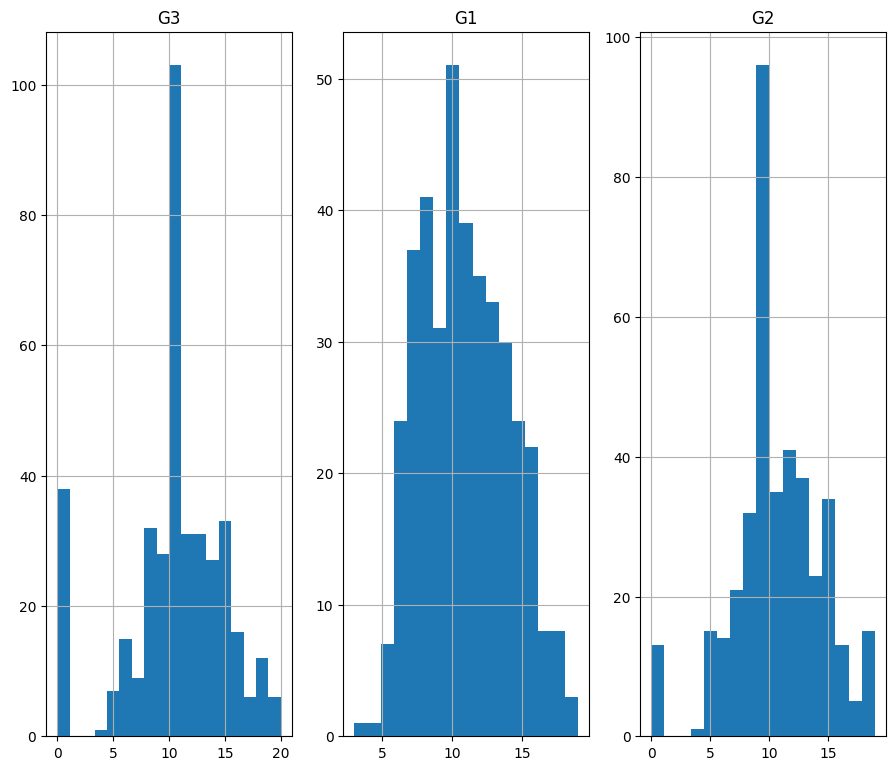

In [ ]:
### Ex-3-Task-1
import matplotlib.pyplot as plt
from math import sqrt
    
def plot_hist(df, ncols=5):
    """Plots histogram of all the column in the dataframe"""  
    
    n = len(df.columns)
    nrows = round(n/ncols) + 1
    f = plt.figure()
    for indx in range(n):
        col = df.columns[indx]
        f.set_figheight(15)
        f.set_figwidth(15)
        plt.subplot(nrows, ncols, indx+1, title=col)
        df[col].hist(bins=len(df[col].unique()))

    plt.tight_layout()
    plt.show()

### BEGIN SOLUTION
plot_hist(math_df[['G3', "G1", "G2"]])
### END SOLUTION

### Exercise 4: Scatterplot
Histogram is for univariate analyis, we should also check how the different features vary together to analyze the relationship of the input feature with the target.

<b><div style="text-align: right">[POINTS: 0]</div></b>

**Task:** 
- plot scatterplot for `G2 vs G3`
- plot scatterplot for `age vs G3`
- determine between `G2` and `age`, which has a positive correlation with the target `G3` by analyzing the plots

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='age', ylabel='G3'>

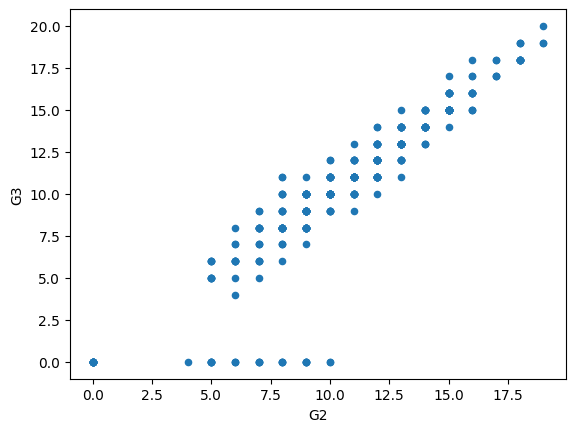

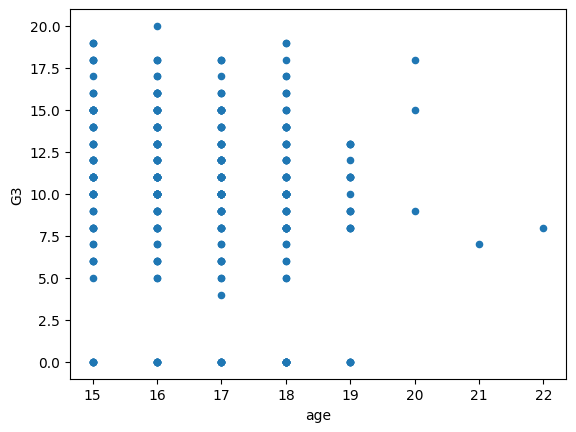

In [ ]:
### Ex-4-Task-1
### BEGIN SOLUTION

math_df.plot.scatter(x='G2', y='G3')
math_df.plot.scatter(x='age', y='G3')


### END SOLUTION

### Exercise 5: Correlations

<b><div style="text-align: right">[POINTS: 1]</div></b>

Correlation shows whether and how strongly pairs of features are related. Features that are strongly correlated with 'G3' are more influential for predictions. 

**Task:**
 

*   Check the correlation of all the numerical features with the target G3.

Hints: 
- Use `pandas.DataFrame.corrwith` function to compute correlation between `X_train` and `y_train`. 
-`corrwith` returns `Series` object with features as `index`.


In [ ]:
### Ex-5-Task-1

### BEGIN SOLUTION
corr = X_train.corrwith(y_train, axis=0)
### END SOLUTION

In [ ]:
assert corr is not None
assert corr.size == 15


*A feature may have a positive or negative correlation with the target. The top five features with strong positive or negative correlation with target should be chosen here.*

In [ ]:
top_five = ["G2", "G1", "Dalc", "Walc", "freetime"]
top_five = np.abs(corr).sort_values(ascending=False).iloc[0:5].index
corr[top_five]

G2          0.908877
G1          0.788115
failures   -0.318010
Medu        0.238431
age        -0.184941
dtype: float64

The variable `top_five` consists of a `list` of top five features based on correlation with the target variable.

### Exercise 6: Fit a Linear Regression model on Top Five Features

<b><div style="text-align: right">[POINTS: 2]</div></b>

Select top five highly correlated data from above exercise and use them to fit a linear regr_num_top5 model

**Task:** 
- Instantiate a `LinearRegression` object as `regr_num_top5` with `fit_intercept` set to `True`
- Fit the model to top 5 features using the training set
- Save coefficients in `Theta` and intercept in `intercept`


In [ ]:
### Ex-6-Task-1


### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression



regr_num_top5 = LinearRegression(fit_intercept=True).fit(X_train[top_five], y_train)
Theta = regr_num_top5.coef_
intercept = regr_num_top5.intercept_
### END SOLUTION

print(Theta)
print(intercept)


[ 0.98998101  0.10226152 -0.15467828  0.04511651 -0.1587905 ]
1.3686594683658821


In [ ]:
assert(len(Theta) == 5)
assert(intercept >= 1.2)


### Exercise 7: Model Prediction
<b><div style="text-align: right">[POINTS: 1]</div></b>

**Task**
- Predict the score for the test set `y_test`

In [ ]:
### Ex-7-Task-1

### BEGIN SOLUTION
y_pred = regr_num_top5.predict(X_test[top_five])

### END SOLUTION

In [ ]:
assert y_pred.shape == (79,)


### Exercise 8: Model Evaluation
<b><div style="text-align: right">[POINTS: 1]</div></b>

Sklearn provides a default evaluation method rmse, also known as root mean square error, that will give some information about the performance of the model. 

**Task**
- Calculate the `rmse score` using `sklearn.metrics` for the test set `y_test`

In [ ]:
### Ex-8-Task-1

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
rmse = mse(y_test, y_pred, squared=False)
### END SOLUTION

In [ ]:
assert(rmse != None)
assert(np.isclose(rmse,2.33978))

The above setup only uses top five highly correlated features, which happens to be all numeric in this case. We should be able to also account for other variables which are categorical in nature.

### Variable Encoding

Machine learning algorithms cannot understand categorical strings such as student's sex (binary: 'F' - female or 'M' - male) unless we convert them to numerical values (0 : 'F' and 1 : 'M'). We can do this using Label Encoding. 

**Label Encoding** assigns a value from 1 through N for each categories for the feature, here we are assuming there are N categories. For eg:  Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) has already been encoded numerically.

Label Encoder assumes that there is some order in the data, i.e value 2 is greater than value 1, which is good if the data is oridnal but it is not suitable for nominal data types without any inherent order, such as mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other'), in such cases we need to perform some other encoding method, such as one-hot Encoding

**One-hot Encoding** maps each category to a vector that contains 1 and 0 denoting the presence or absence of the feature. Hence, this method will create multiple columns based on the cardinality of the features, i.e number of categories in the feature. For: eg: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') has 4 different categories, hence 4 columns will be created.

This has been done for you in the following code. Do Check the columns of the new dataframe.

You can read about different types of encoding [here](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02).

In [ ]:
### RUN THIS CELL

from sklearn.preprocessing import LabelEncoder

def preprocess(df):
    numeric = ['age', 'traveltime', 'Medu','Fedu', 'studytime', 'failures', 'famrel', 
               'freetime', 'goout', 'Dalc', 'Walc', 'health' , 'absences', 'G1', 'G2']
    cat_nominal = ['Mjob', 'Fjob', 'reason', 'guardian']
    cat_binary = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                  'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

    df[cat_binary] = df[cat_binary].apply(LabelEncoder().fit_transform)  # label_encoding

    df = pd.get_dummies(df, columns=cat_nominal, prefix=cat_nominal)  # one-hot encoding
    return df

X_train, X_test = preprocess(X_train), preprocess(X_test)    
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
64,0,0,15,1,1,1,4,3,1,2,...,0,1,0,0,0,0,1,1,0,0
55,0,0,16,1,0,0,2,1,1,2,...,1,0,0,0,0,1,0,0,1,0
343,0,0,17,1,0,0,2,2,1,2,...,0,0,0,0,1,0,0,1,0,0
219,0,0,17,1,0,1,2,2,1,3,...,0,0,0,1,0,0,0,0,1,0
366,1,1,18,1,1,1,4,4,2,3,...,0,1,0,0,0,1,0,0,1,0


### Exercise 9: Fit a Linear Regression model on all Features
<b><div style="text-align: right">[POINTS: 1]</div></b>

Fit a linear regression model on all features after preprocessing.


**Task:** 
- Instantiate a `LinearRegression` object as `regr_all` with `fit_intercept` set to `True`
- Fit the model to all the features using the above preprocessed training set
- Save coefficients in `Theta` and intercept in `intercept`

In [ ]:
### Ex-9-Task-1


### BEGIN SOLUTION
regr_all = LinearRegression().fit(X_train, y_train)
Theta = regr_all.coef_
intercept = regr_all.intercept_
### END SOLUTION

In [ ]:
assert(len(Theta) == 45)
assert(intercept != None)
assert(hasattr(regr_all, 'coef_'))

### Exercise 10: Model Evaluation
<b><div style="text-align: right">[POINTS: 1]</div></b>

`Mean Absolute Error (MAE)` and `Root mean squared error (RMSE)` are two of the most common metrics used to measure accuracy for continuous variables. Both MAE and RMSE express average model prediction error in units of the variable of interest.

**Task:**
- calculate `MAE` and `RMSE` using `sklearn.metrics` and assign it to the respective variables below.

In [ ]:
### Ex-10-Task-1


### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error , mean_absolute_error
mae_value = mean_absolute_error(y_test, y_pred)
rmse_value = mean_squared_error(y_test, y_pred, squared=False)
### END SOLUTION

print("rmse: ", rmse_value, "\n"
      "mae: ", mae_value)

rmse:  2.339786416840782 
mae:  1.3296474215488832


In [ ]:
assert (rmse_value < 3)

### Exercise 11: Are these values good enough ?
<b><div style="text-align: right">[POINTS: 2]</div></b>

How can we make sure that the RMSE, MAE values. One common method is to use a baseline model. A baseline model is a simple model that predicts in a very simple manner such as always predicting the mean value.

**Task:**
- Create a baseline model that always predicts the mean of the data used in training
- Calculate the root mean squared error and mean absolute error using baseline model
- Answer the quizzes below based on your calculations

**Hints:**
- Use `DummyRegressor` from `sklearn.dummy` module.
- Instantiate a `DummyRegressor` object as `base_model` with `strategy` set to `mean`
- Fit the model to all the features using the above preprocessed training set


In [ ]:
### Ex-11-Task-1



### BEGIN SOLUTION
from sklearn.dummy import DummyRegressor
base_model = DummyRegressor(strategy="mean").fit(X_train, y_train)
y_pred=base_model.predict(X_test)
rmse_base = mse(y_test, y_pred, squared=False)

mae_base =mae(y_test, y_pred)
### END SOLUTION

print("rmse: ", rmse_base, "\n"
      "mae: ", mae_base)


rmse:  5.260925333334679 
mae:  4.120573626021471


In [ ]:
assert(base_model != None)
assert(rmse_base != None)
assert(mae_base != None)

assert(np.isclose(round(rmse_base,4), 5.2609))
assert(np.isclose(round(mae_base,4),4.12057))